## Interférences à la surface d'un liquide en présence de deux sources

In [84]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm

from matplotlib.colors import LinearSegmentedColormap

In [85]:
def superposition(x, y, x1, y1, x2, y2, longueur_onde):
    """
    Calcule l'élongation résultant de la superposition des deux ondes.
    """
    a0 = 1.0  # amplitude de chaque onde sinusoïdale
    k = 2 * np.pi / longueur_onde  # Vecteur d'onde
    r1 = np.sqrt(
        (X - x1)**2 + (Y - y1)**2)  # Distance du point M à la source 1
    r2 = np.sqrt(
        (X - x2)**2 + (Y - y2)**2)  # Distance du point M à la source 2
    return a0 * np.sin(k * r1) + a0 * np.sin(k * r2)  # Intensités

In [86]:
# Paramètres
longueur_onde = 4.0  # Longueur d'onde de l'onde

decalage = 20.0  # Décalage par rapport à l'origine pour les sources
side = 300  # Valeur d'un côté de la scène (le tout forme un carré)
points = 1000  # Nombre de points dans la
pas = side / points  # Pas entre deux abcisses ou deux ordonnées

# Position de la source 1
x1 = side / 2 + decalage / 2
y1 = side / 2
# Position de la source 2
x2 = side / 2 - decalage / 2
y2 = side / 2

# Création du tableau pour stocker les valeurs de l'intensité en chaque point
s = np.empty([points, points], dtype=float)

# Calculs des valeurs des intensités en chaque point
X, Y = np.meshgrid(np.linspace(0, side, points), np.linspace(0, side, points))

Z = superposition(X, Y, x1, y1, x2, y2, longueur_onde)  # Intensités

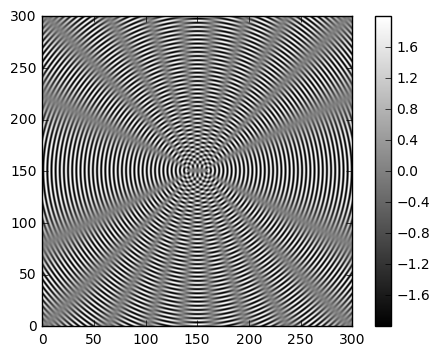

In [87]:
# Construction du graphique
plt.imshow(Z, origin="lower", extent=[0, side, 0, side])
plt.gray()
plt.colorbar()

# Sauvegarde de l'image
plt.savefig("surface_eau.pdf")
plt.show()

## Trous d'Young en lumière monochromatique

In [88]:
def eclairement(x, a, longueur_onde, D):
    I0 = 2  # Intensité de l'onde sans interférences
    return I0 * (1 + np.cos(2 * np.pi / longueur_onde * a * x / D))

In [89]:
def graphique_trous_young(x, y, z, couleur_primaire, x_side, y_side):
    """Fonction pour la construction du graphique"""
    fig = plt.figure(figsize=(10, 3.5))
    
    ax1 = fig.add_subplot(211)
    ax2 = fig.add_subplot(212, sharex=ax1)

    ax1.ticklabel_format(axis='both', style='sci', scilimits=(0,0))
    ax2.set_xlabel(r'$x$ (m)')
    ax2.set_ylabel('Intensité')

    ax1.axis('off')

    ax1.set_xlim(-x_side, x_side)
    ax1.set_ylim(-y_side, y_side)
    ax2.set_xlim(-x_side, x_side)
    

    cmap = {
        'red': LinearSegmentedColormap.from_list(
            'redmap', ((0, 0, 0), (1, 0, 0)), N=30, gamma=1.0),
        'green': LinearSegmentedColormap.from_list('greenmap',
                                                   ['black', 'green']),
        'blue': LinearSegmentedColormap.from_list('bluemap',
                                                  ['black', 'blue'])
    }

    ax1.imshow(
        z,
        origin="lower",
        extent=[-x_side, x_side, -y_side, y_side],
        cmap=cmap[couleur_primaire])

    ax2.plot(x[1], z[1], color=couleur_primaire)
    ax2.grid()

    fig.savefig("Trous d'Young {}.pdf".format(couleur_primaire))
    plt.show()

In [90]:
# Paramètres
longueurs_onde = {
    'red': 611E-9,
    'green': 549E-9,
    'blue': 464E-9
}  # Longueurs d'onde

a = 1E-2  # distance entre les deux trous
D = 4  # Distance de l'écran
x_side = 2E-3  # Largeur de la figure d'interférence est 2 * side
y_side = 3E-2
x_nbre_points = 500
y_nbre_points = 50

X, Y = np.meshgrid(
    np.linspace(-x_side, x_side, x_nbre_points),
    np.linspace(-y_side, y_side, y_nbre_points))

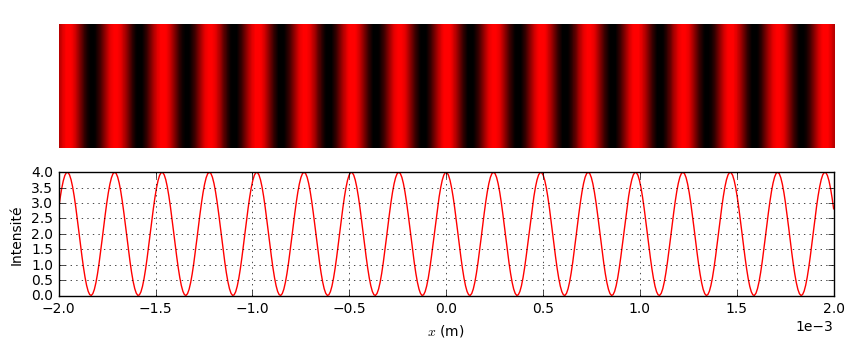

In [91]:
# Rouge
Z_red = eclairement(X, a, longueurs_onde['red'], D)

graphique_trous_young(X, Y, Z_red, 'red', x_side, y_side)

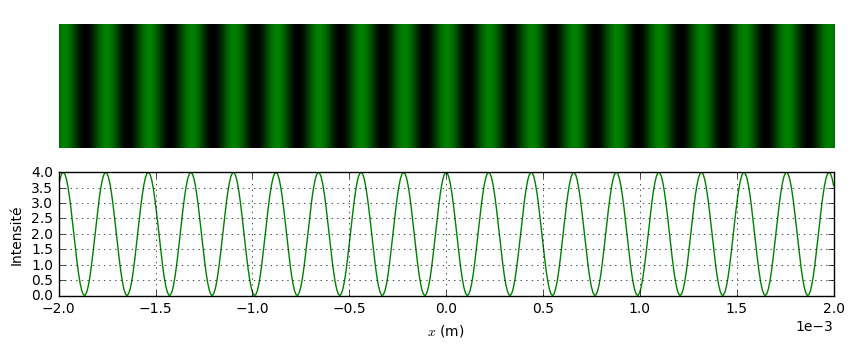

In [92]:
# Vert
Z_green = eclairement(X, a, longueurs_onde['green'], D)

graphique_trous_young(X, Y, Z_green, 'green', x_side, y_side)

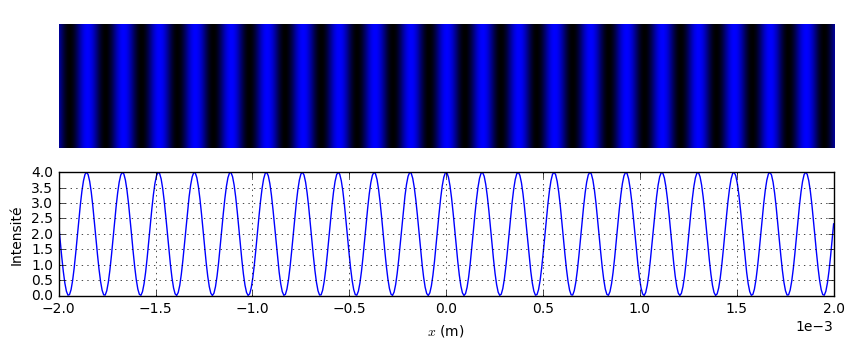

In [93]:
# Bleu
Z_blue = eclairement(X, a, longueurs_onde['blue'], D)

graphique_trous_young(X, Y, Z_blue, 'blue', x_side, y_side)

## Trous d'Young en lumière blanche

In [94]:
def graphiques_trous_young(x, y, list_z, list_couleur_primaire, x_side,
                           y_side):
    """Fonction pour la construction du graphique"""
    fig = plt.figure(figsize=(10, 3.5))

    ax1 = fig.add_subplot(111)

    ax1.ticklabel_format(axis='x', style='sci', scilimits=(0, 0))
    ax1.set_xlabel(r'$x$ (m)')
    ax1.set_ylabel('Intensité')

    ax1.set_xlim(-x_side, x_side)

    for i, z in enumerate(list_z):
        ax1.plot(x[1], z[1], color=list_couleur_primaire[i])
        ax1.grid()

    fig.savefig("Trous d'Young - éclairement en lumière blanche.pdf")
    plt.show()

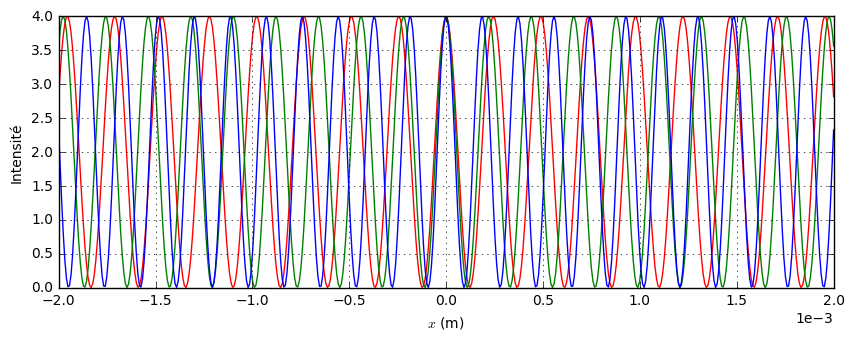

In [95]:
graphiques_trous_young(X, Y, (Z_red, Z_green, Z_blue), ('red', 'green', 'blue'), x_side, y_side)

In [96]:
# Normalisation des tableaux
def normalisation(Z):
    
    (n_max, m_max) = Z.shape
    val_max = np.amax(Z)

    Z_norm = Z / val_max
    return Z_norm

Z_red_norm = normalisation(Z_red)
Z_green_norm = normalisation(Z_green)
Z_blue_norm = normalisation(Z_blue)

In [99]:
# Création d'une image en RGB
img = np.zeros((Z_red_norm.shape[0], Z_red_norm.shape[1], 3), dtype=np.float)
for y in range(Z_red_norm.shape[0]):
    for x in range(Z_red_norm.shape[1]):
        img[y, x] = (Z_red_norm[y, x], Z_green_norm[y, x], Z_blue_norm[y, x])

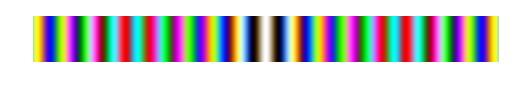

In [101]:
# Affichage de l'image
plt.imshow(img)
plt.axis("off")
plt.savefig("Trous d'Young en lumière blanche.pdf")
plt.show()